<a href="https://colab.research.google.com/github/Skriller18/Model_Comparisons/blob/main/RESNET_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [2]:
!kaggle datasets download -d yuzhenlu/cottonweeddet3

100% 5.21G/5.21G [02:09<00:00, 43.9MB/s]
100% 5.21G/5.21G [02:09<00:00, 43.1MB/s]


In [3]:
!git clone https://github.com/AUAgroup/early-crop-weed

Cloning into 'early-crop-weed'...
remote: Enumerating objects: 515, done.
remote: Total 515 (delta 0), reused 0 (delta 0), pack-reused 515
Receiving objects: 100% (515/515), 2.30 GiB | 21.65 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (511/511), done.


In [4]:
!unzip /content/cottonweeddet3.zip

Archive:  /content/cottonweeddet3.zip
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_11.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_17.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_21.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_29.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_30.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_33.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_36.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_37.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_39.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_40.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_53.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_57.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_59.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_61.json  
  inflatin

In [5]:
!mkdir dataset

In [6]:
!mkdir dataset/train
!mkdir dataset/test

In [7]:
!mkdir dataset/train/Crop
!mkdir dataset/train/Weed
!mkdir dataset/test/Crop
!mkdir dataset/test/Weed

In [8]:
from os.path import dirname
import os

#Walk through
for dirpath, dirnames, filenames, in os.walk("/content/early-crop-weed/tomato"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 0 directories and 201 images in /content/early-crop-weed/tomato


In [9]:
!mkdir Crop
!mkdir Weed

In [10]:
import os
import random
import shutil

def copy_images(source_folder, destination_folder, n):
    # Get a list of all files in the source folder
    files = os.listdir(source_folder)

    # Filter only image files (you can modify the condition as needed)
    image_files = [file for file in files if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Select n random images
    selected_images = random.sample(image_files, n)

    # Copy selected images to the destination folder
    for image in selected_images:
        source_path = os.path.join(source_folder, image)
        destination_path = os.path.join(destination_folder, image)
        shutil.copy(source_path, destination_path)

# Example usage
source_folder = '/content/CottonWeedDet3/images'
destination_folder = '/content/Weed'
n = 201  # Number of images to select and copy

copy_images(source_folder, destination_folder, n)


In [11]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split

source_folder = "/content/early-crop-weed/tomato"
train_folder = "/content/dataset/train/Crop"
test_folder = "/content/dataset/test/Crop"

file_list = os.listdir(source_folder)
train_files, test_files = train_test_split(file_list, test_size=0.2, random_state=42)

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

for file_name in train_files:
    shutil.move(os.path.join(source_folder, file_name), os.path.join(train_folder, file_name))

for file_name in test_files:
    shutil.move(os.path.join(source_folder, file_name), os.path.join(test_folder, file_name))

In [12]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split

source_folder = "/content/Weed"
train_folder = "/content/dataset/train/Weed"
test_folder = "/content/dataset/test/Weed"

file_list = os.listdir(source_folder)
train_files, test_files = train_test_split(file_list, test_size=0.2, random_state=42)

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

for file_name in train_files:
    shutil.move(os.path.join(source_folder, file_name), os.path.join(train_folder, file_name))

for file_name in test_files:
    shutil.move(os.path.join(source_folder, file_name), os.path.join(test_folder, file_name))


In [13]:
#Walk through
for dirpath, dirnames, filenames, in os.walk("/content/dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in /content/dataset
There are 2 directories and 0 images in /content/dataset/train
There are 0 directories and 160 images in /content/dataset/train/Crop
There are 0 directories and 160 images in /content/dataset/train/Weed
There are 2 directories and 0 images in /content/dataset/test
There are 0 directories and 41 images in /content/dataset/test/Crop
There are 0 directories and 41 images in /content/dataset/test/Weed


In [14]:
#Plotting our loss curves
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label="Validation_loss")
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.ylabel("Losses")
  plt.legend()

  #Plot accuracy curves
  plt.figure()
  plt.plot(epochs, accuracy, label="Training_accuracy")
  plt.plot(epochs, val_accuracy, label="Validation_accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()


In [15]:
##EFFECIENT NET WORKING

from tensorflow.keras import layers, models

def build_efficient_net(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Create the EfficientNet model
model = build_efficient_net(input_shape, num_classes)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [16]:
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Create the EfficientNet model
model = build_efficient_net(input_shape, num_classes)

# Compile the model
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Specify the path to your training and testing data
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

# Set batch size and number of training steps
batch_size = 32

# Generate batches of augmented training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generate batches of validation data (without augmentation)
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

# Fit the model
model_history = model.fit(
                          train_generator,
                          epochs=10,
                          validation_data=validation_generator
                      )


Found 320 images belonging to 2 classes.
Found 82 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 173s 16s/step - loss: 1.0362 - accuracy: 0.5500 - val_loss: 0.6418 - val_accuracy: 0.5366
Epoch 2/10
10/10 [==============================] - 153s 16s/step - loss: 0.5516 - accuracy: 0.7375 - val_loss: 0.5401 - val_accuracy: 0.8049
Epoch 3/10
10/10 [==============================] - 153s 16s/step - loss: 0.4634 - accuracy: 0.7500 - val_loss: 0.4413 - val_accuracy: 0.7927
Epoch 4/10
10/10 [==============================] - 150s 15s/step - loss: 0.3333 - accuracy: 0.8313 - val_loss: 0.5304 - val_accuracy: 0.7073
Epoch 5/10
10/10 [==============================] - 152s 15s/step - loss: 0.4114 - accuracy: 0.7688 - val_loss: 0.4948 - val_accuracy: 0.7805
Epoch 6/10
10/10 [==============================] - 154s 16s/step - loss: 0.3015 - accuracy: 0.8562 - val_loss: 0.3819 - val_accuracy: 0.9268
Epoch 7/10
10/10 [==============================] - 156s 16s/step -

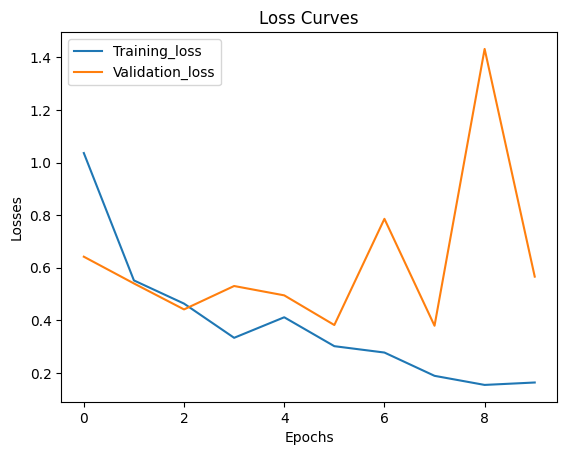

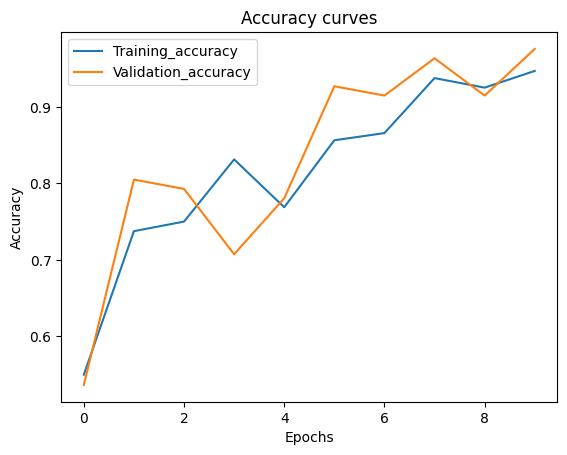

In [17]:
plot_loss_curves(model_history)